# load_sc_data.py

Code to read data in the "SpineCreator log format".

In [17]:
import array as ar
import numpy as np
import struct

In [2]:
# Just an example path, this is normally passed into the function
file_path = '/home/seb/src/SpineML_2_BRAHMS/temp/log/Sebtest1_v_log.bin'

In [4]:
# If file path ends with .bin, or .xml then find the root name.
end = len(file_path)
bin_end = file_path [end-4:end]
xml_end = file_path [end-7:end]
if (bin_end == '.bin'):
    base_path = file_path [:end-4]
elif (xml_end == 'rep.xml'):
    base_path = file_path [:end-7]
else:
    # Error
    print 'Error: Bad SpineCreator log file name: ' + file_path

xml_file = base_path + 'rep.xml'
bin_file = base_path + '.bin'


In [5]:
dt = 1

## Do the XML reading thing

Going to optionally read the XML file associated with the binary data.

In [61]:
num_neurons = 0
if (num_neurons == 0):
    # Find the number of neurons in the binary log file from the xml file.
    import xml.etree.ElementTree as ET
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Assumed Analog Log here. May be wrong for event log.
    logFileType = root.find('.//LogFileType')
    if logFileType.text != 'binary':
        print 'File described by ', xml_file, ' is not marked as being in binary format.'
        # return

    # Log end is in steps of size dt. Unused at present even though
    # this is in the UI? Also may need logStartTime in future to
    # generate t.
    logEndTime = float(root.find('.//LogEndTime').text)
    num_neurons = int(root.find('.//LogAll').get('size'))
    # Timestep is specified in milliseconds
    dt = float(root.find('.//TimeStep').get('dt'))
    print 'End time =', logEndTime, 'ms  num_neurons =', num_neurons, ' dt =', dt, 'ms'

End time = 1000.0 ms  num_neurons = 1  dt = 0.1 ms


##Load the binary data

In [12]:
struct_fmt = 'd'
struct_len = struct.calcsize(struct_fmt)
struct_unpack = struct.Struct(struct_fmt).unpack_from

results = []
with open(bin_file, "rb") as fid:
    while True:
        data = fid.read(struct_len)
        if not data: break
        s = struct_unpack(data)
        #print 's[0]=', s[0]
        results.append(s[0])
count = len(results)
print 'count', count

count 10000


##Create the time series

In [16]:
t = np.linspace (0, (dt*count)-dt, count)
print t, ' count: ', len(t)


[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   9.99700000e+03
   9.99800000e+03   9.99900000e+03]  count:  10000


##Do a sample plot

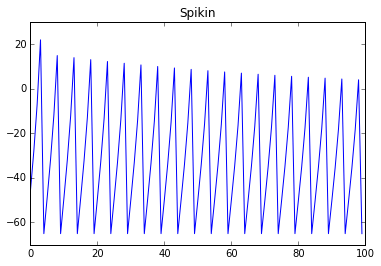

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot (t[:100], results[:100])
plt.title("Spikin")